<a href="https://colab.research.google.com/github/swathivenkatesan87/24ADI003-24BAD122-ML/blob/main/Exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict ocean water temperature using environmental and depth-related features.
Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/sohier/calcofi
Target Variable:
• Water Temperature (T_degC)
Sample Input Features
• Depth (m)
• Salinity
• Oxygen
• Latitude
• Longitude
IN-LAB TASKS
• Import necessary Python libraries (NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn).
• Load the CalCOFI dataset into a Pandas DataFrame
• Select relevant numerical features and target variable.
• Handle missing values using mean/median imputation.
• Perform feature scaling using StandardScaler.
• Split the dataset into training and testing sets.
• Train a Linear Regression model using Scikit-learn.
• Predict water temperature for test data

Columns available in dataset:
['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']

Linear Regression Performance
MSE : 6.2214468826180624
RMSE: 2.4942828393384064
R2  : 0.6492792001567064
Ridge R2: 0.6492792004578982
Lasso R2: 0.6443040650930254


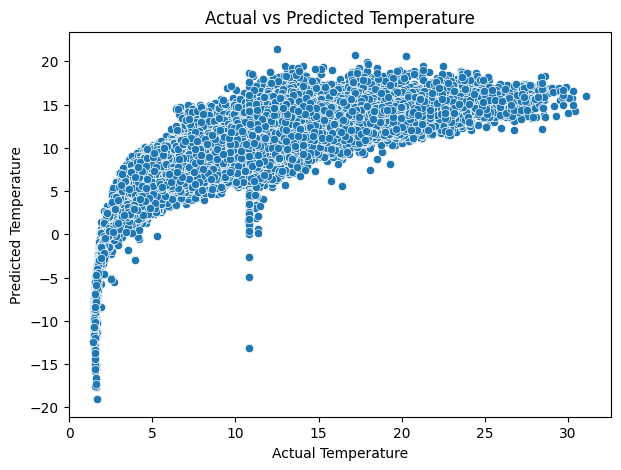

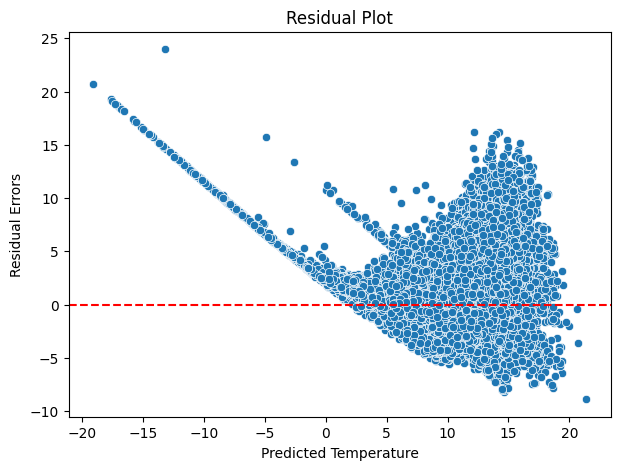

In [ ]:
# ---------------------------------------------
# Name      : SWATHI
# Roll No   : 24BAD122
# Experiment: Regression and Optimization
# Dataset   : CalCOFI
# ---------------------------------------------

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

# ------------------------------------------------
# Load Dataset (upload bottle.csv.zip to Colab/Drive)
# ------------------------------------------------
data = pd.read_csv("bottle.csv.zip", low_memory=False)

# Remove extra spaces in column names
data.columns = data.columns.str.strip()

# Print columns to verify
print("Columns available in dataset:")
print(data.columns.tolist())

# ------------------------------------------------
# Select Features and Target (only if they exist)
# ------------------------------------------------
all_features = ['Depthm', 'Salnty', 'O2ml_L', 'Lat_Dec', 'Lon_Dec']
target = 'T_degC'

# Keep only existing columns
features = [col for col in all_features if col in data.columns]

# Ensure target exists
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found in dataset.")

df = data[features + [target]].copy()


# Handle Missing Values (Mean Imputation)

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split X and y
X = df[features]
y = df[target]


# Feature Selection (Optional: keep best 4 features)

if X.shape[1] > 4:
    selector = SelectKBest(score_func=f_regression, k=4)
    X = selector.fit_transform(X, y)

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation Metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)


# Ridge Regression (Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R2:", r2_score(y_test, ridge_pred))


# Lasso Regression (Regularization)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R2:", r2_score(y_test, lasso_pred))

# Visualization

# Actual vs Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Temperature")
plt.ylabel("Residual Errors")
plt.title("Residual Plot")
plt.show()

SCENARIO 2:
Classify whether LIC stock price will increase (1) or decrease (0) based on historical data.
Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/debashis74017/lic-stock-price-data
Target Variable (Derived):
• Price Movement
– 1 → Closing price > Opening price
– 0 → Closing price ≤ Opening price
Input Features:
• Open
• High
• Low
• Volume

Dataset Shape: (3684, 6)
                        date    open    high    low   close    volume
0  2022-05-17 09:35:00+05:30  872.00  872.00  872.0  872.00   3759243
1  2022-05-17 09:45:00+05:30  872.00  872.00  872.0  872.00         0
2  2022-05-17 09:55:00+05:30  872.00  918.10  862.0  902.80  12449251
3  2022-05-17 10:05:00+05:30  902.45  908.95  896.0  902.15   5237329
4  2022-05-17 10:15:00+05:30  902.30  905.00  900.0  903.85   1820317

Accuracy: 0.6160108548168249

Confusion Matrix:
[[433  10]
 [273  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       443
           1       0.68      0.07      0.13       294

    accuracy                           0.62       737
   macro avg       0.65      0.52      0.44       737
weighted avg       0.64      0.62      0.50       737



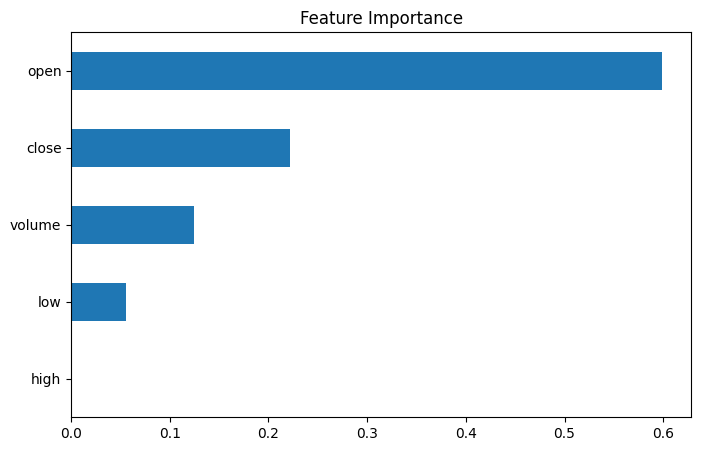

In [ ]:
# ---------------------------------------------
# Name      : SWATHI
# Roll No   : 24BAD122
# Experiment: Decision Tree Classifier
# Dataset   : Stock Market Dataset
# Objective : Predict whether price goes UP or DOWN
# ---------------------------------------------

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("swathi-24BAD122")
data = pd.read_csv("loan_prediction.csv")   # (Your uploaded file is stock data)

print("Dataset Shape:", data.shape)
print(data.head())
---------------
# Handle MissinValues (Updated method)



# Create Target Column (Price Movement)

data['Target'] = np.where(data['close'] > data['open'], 1, 0)

# Feature Selection

features = ['open', 'high', 'low', 'close', 'volume']
target = 'Target'

X = data[features]
y = data[target]

# Train-Test Split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree Model

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


# Evaluation

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Feature Importance Plot

importance = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(8,5))
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()



Certainly! This code cell implements a Decision Tree Classifier to predict stock price movement. Let me break it down for you:

Import Libraries: It begins by importing essential libraries like NumPy for numerical operations, Pandas for data manipulation, Matplotlib and Seaborn for plotting, and various modules from Scikit-learn for model selection, the Decision Tree algorithm, and evaluation metrics.
Data Loading: It loads the dataset from a CSV file named loan_prediction.csv into a Pandas DataFrame. There's a comment indicating that this file is intended to be stock data.
Create Target Column (Price Movement): A new column named 'Target' is created. It's assigned a value of 1 if the 'close' price is greater than the 'open' price (indicating a price increase), and 0 otherwise (indicating a decrease or no change).
Feature Selection: Specific columns ('open', 'high', 'low', 'close', 'volume') are chosen as input features (X), and the newly created 'Target' column is set as the output variable (y).
Train-Test Split: The dataset is divided into training and testing sets (80% for training, 20% for testing) to evaluate the model's performance on unseen data.
Decision Tree Model: A DecisionTreeClassifier is initialized with a maximum depth of 5 to prevent overfitting, and then trained using the training data.
Prediction: The trained model makes predictions on the test set (X_test).
Evaluation: The model's performance is assessed using several metrics:
Accuracy Score: The proportion of correctly classified instances.
Confusion Matrix: A table showing the counts of true positive, true negative, false positive, and false negative predictions.
Classification Report: Provides precision, recall, F1-score, and support for each class.
Feature Importance Plot: Finally, it calculates and visualizes the importance of each feature in making predictions, helping to understand which features contribute most to the